# KickStarter Project

## Table of Contents
1. Import Libraries ad Data
2. Explorative Data Analysis
3. Feature analysis
4. Data visualization
5. Partition dataset into train / test sets
6. Modelling and Hyperparameter Optimization
7. Conclusion

# 1. Import Libraries and Data

# 1.1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rcParams, cycler
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import datetime as dt
sns.set_style('whitegrid')
%matplotlib inline

## 1.2. Load Data

The present project analyse the dataset of Kickstarter projects, one of the most renown platforms to for promoting(mostly) creative, smart and visionary ideas and concepts.

In [2]:
#importing data
df = pd.read_csv('/Users/anamatias/Documents/github/Kickstarter_Project/DSI_kickstarterscrape_dataset.csv',encoding='latin1', index_col = 0)

# 2. Explorative Data Analysis (EDA)

In [3]:
# show first 5 observations of dataframe for exploration purposes
df.head()

,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
project id,,,,,,,,,,,,,,,,
39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [4]:
#check how many rows and columns
print('Dimension of the dataset:', df.shape)

Dimension of the dataset: (45957, 16)


In [5]:
# name of the columns
df.columns

Index(['name', 'url', 'category', 'subcategory', 'location', 'status', 'goal',
       'pledged', 'funded percentage', 'backers', 'funded date', 'levels',
       'reward levels', 'updates', 'comments', 'duration'],
      dtype='object')

In [6]:
#get some info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45957 entries, 39409 to 2147460119
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               45957 non-null  object 
 1   url                45957 non-null  object 
 2   category           45957 non-null  object 
 3   subcategory        45957 non-null  object 
 4   location           44635 non-null  object 
 5   status             45957 non-null  object 
 6   goal               45957 non-null  float64
 7   pledged            45945 non-null  float64
 8   funded percentage  45957 non-null  float64
 9   backers            45957 non-null  int64  
 10  funded date        45957 non-null  object 
 11  levels             45957 non-null  int64  
 12  reward levels      45898 non-null  object 
 13  updates            45957 non-null  int64  
 14  comments           45957 non-null  int64  
 15  duration           45957 non-null  float64
dtypes: float64(4)

In [7]:
#number of missing values per column
df.isnull().sum().sort_values(ascending = False)

location             1322
reward levels          59
pledged                12
duration                0
comments                0
updates                 0
levels                  0
funded date             0
backers                 0
funded percentage       0
goal                    0
status                  0
subcategory             0
category                0
url                     0
name                    0
dtype: int64

In [8]:
#remove the rows with the missing values
df.dropna(inplace = True)

In [9]:
#look for duplicate values
df.duplicated().sum()

88

In [10]:
#drop the duplicated rows
df = df.drop_duplicates(subset=None, keep='first')

In [11]:
#number of unique valuesper column, sorted by descending order
df.T.apply(lambda x: x.nunique(), axis = 1).sort_values(ascending = False)

url                  44441
name                 44382
funded date          40017
reward levels        27685
funded percentage    21517
pledged              10828
duration              5758
location              4847
goal                  1794
backers                966
comments               310
updates                 83
levels                  63
subcategory             51
category                14
status                   5
dtype: int64

#### Status of the project
Status show how successfull was your project

In [12]:
#Calculate frequency 
def categorical_count(df, feature):
    #Calculate frequency on% and value
    freq = pd.concat([df[feature].value_counts(normalize=True) * 100, df[feature].value_counts(normalize=False)], axis=1)
    #rename columns
    freq.columns = [feature + '_%', feature + '_count']
    return freq

In [13]:
categorical_count(df, 'status')

,status_%,status_count
successful,50.080913,22282
failed,41.002877,18243
live,8.774611,3904
canceled,0.132608,59
suspended,0.008990,4


<function matplotlib.pyplot.show(close=None, block=None)>

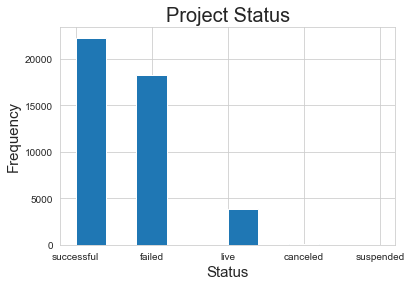

In [14]:
#Histogram to check the frequency of the different status
plt.hist(df['status'])
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Project Status',fontsize = 20)
plt.show

Based on the table and histogram above we can confirm that "Status" don't follow a normal distribution. "Failed" and "Successful" contain 91% of all projects. 

The main goal of exercise is to identify the attributes that are important for the sucess or failure of the projects. The projects with status 'live', 'canceled' or 'suspended' can be dropped once can't be confirm for sure they would be successful or fail. For the further analysis we will keep just these two classes. 

In [15]:
#return only sucessful and failed projects
df = df.loc[df['status'].isin(['successful', 'failed'])]
df.head()

,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
project id,,,,,,,,,,,,,,,,
39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00
316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film & Video,Short Film,"Portland, OR",successful,3500.0,3582.0,1.023331,39,"Wed, 22 Jun 2011 13:33:00 -0000",7,"$5,$25,$50,$100,$250,$500,$1,000",8,0,21.43


'Status' was transformed in a binary classification problem.

In [16]:
categorical_count(df, 'status')

,status_%,status_count
successful,54.983344,22282
failed,45.016656,18243


In [17]:
#replace the categorical data by 1 and 0 values, where 1 means 'successfull' and 0 'failed'
status = pd.get_dummies(df['status'],drop_first=True)
df.drop(['status'],axis=1,inplace=True)
df = pd.concat([df,status],axis=1)
df.head()

,name,url,category,subcategory,location,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration,successful
project id,,,,,,,,,,,,,,,,
39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,1
126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18,0
237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,1
246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00,0
316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film & Video,Short Film,"Portland, OR",3500.0,3582.0,1.023331,39,"Wed, 22 Jun 2011 13:33:00 -0000",7,"$5,$25,$50,$100,$250,$500,$1,000",8,0,21.43,1


### Features which will be used for further analysis
Features that are leaking our label so that the classifier will be able to predict sucess of projects right after it's launch.
    .name
    .category
    .subcategory
    .location
    .goal
    .pledge
    .backers
    .reward level
    .updates
    .comments
    .duration
    .successful



In [18]:
#Drop columns not relevant for this analysis
df = df.drop(['url', 'subcategory','funded percentage','levels', 'reward levels', 'updates', 'comments'], axis = 1, inplace = False)
df.head()

,name,category,location,goal,pledged,backers,funded date,duration,successful
project id,,,,,,,,,
39409,WHILE THE TREES SLEEP,Film & Video,"Columbia, MO",10500.0,11545.0,66,"Fri, 19 Aug 2011 19:28:17 -0000",30.00,1
126581,Educational Online Trading Card Game,Games,"Maplewood, NJ",4000.0,20.0,2,"Mon, 02 Aug 2010 03:59:00 -0000",47.18,0
237090,GETTING OVER - One son's search to finally kno...,Film & Video,"Los Angeles, CA",6000.0,6535.0,100,"Sun, 08 Apr 2012 02:14:00 -0000",32.22,1
246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,Fashion,"Novi, MI",3500.0,0.0,0,"Wed, 01 Jun 2011 15:25:39 -0000",30.00,0
316217,Dinner Party - a short film about friendship.....,Film & Video,"Portland, OR",3500.0,3582.0,39,"Wed, 22 Jun 2011 13:33:00 -0000",21.43,1


In [19]:
# Rename `funded date` to `funded_date`
df.rename(columns={'funded date':'funded_date'}, inplace=True)

 # 3. Feature analysis

## What is the mean (total) pledge that projects get? (not per backer)

In [20]:
# Mean of pledge
pledge_mean = df['pledged'].mean()
print(f'The mean total pledge is a $ {round(pledge_mean,2)}')

The mean total pledge is a $ 5211.08


## Create a histogram that shows the distribution for number of backers. What is the skew of the distribution?

<function matplotlib.pyplot.show(close=None, block=None)>

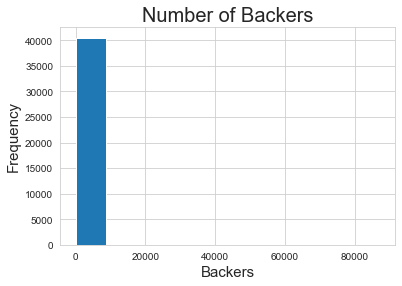

In [21]:
#Plotting the Histogram
plt.hist(df['backers'])
plt.xlabel('Backers', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Number of Backers', fontsize = 20)
plt.show

#Skew of the distribution
The skew shows the level of the distortion from the symmetry bell curve or the normal distribution. 

## What type of projects would be most successful at getting funded?¶

In [22]:
# Print categories
df['category'].unique().tolist()

['Film & Video',
 'Games',
 'Fashion',
 'Music',
 'Art',
 'Dance',
 'Publishing',
 'Theater',
 'Comics',
 'Technology',
 'Design',
 'Photography',
 'Food',
 'Film &amp; Video']

In [23]:
order = (df.loc[df.successful==1]['category'].value_counts())/(df['category'].value_counts())
order_1 = order.index

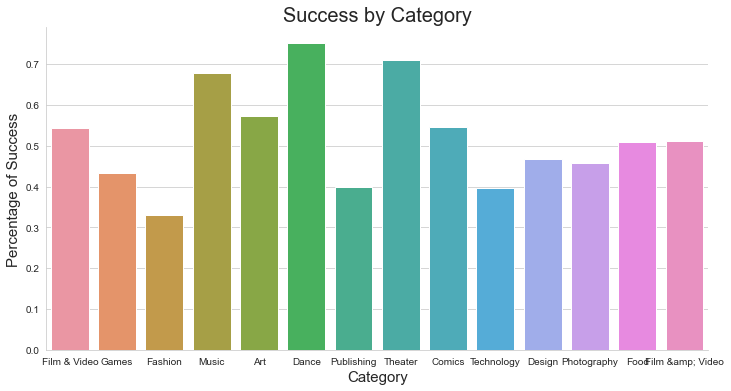

In [24]:
# Plot showing the percentage of Success
sns.catplot(y='successful', x= 'category', data=df, kind='bar', ci = None, aspect = 2)
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Percentage of Success', fontsize = 15)
plt.title('Success by Category', fontsize = 20)
plt.show()

In [25]:
# Print locations
df['location'].unique().tolist()

['Columbia, MO',
 'Maplewood, NJ',
 'Los Angeles, CA',
 'Novi, MI',
 'Portland, OR',
 'Collegedale, TN',
 'Chicago, IL',
 'Ashland, OR',
 'New York, NY',
 'Washington, DC',
 'Boise, ID',
 'Tampa, FL',
 'Austin, TX',
 'Denver, CO',
 'Eugene, OR',
 'San Francisco, CA',
 'Portland, ME',
 'Taipei, Taiwan',
 'Indianapolis, IN',
 'Nashville, TN',
 'Brooklyn, NY',
 'Evansville, IN',
 'Forney, TX',
 'Dallas, TX',
 'South Bend, IN',
 'Oslo, Norway',
 'Minneapolis, MN',
 'Arcadia, CA',
 'Raleigh, NC',
 'Somerville, MA',
 'Philadelphia, PA',
 'Hamden, CT',
 'Cocham\x92ÛÎ_, Chile',
 'Orlando, FL',
 'Lower East Side, NY',
 'Oakland, CA',
 'Clovis, CA',
 'New Haven, CT',
 'Baltimore, MD',
 'San Rafael, CA',
 'Azusa, CA',
 'St Augustine, FL',
 'Miami, FL',
 'Gainesville, FL',
 'Ewa Beach, HI',
 'Virginia Beach, VA',
 'Seattle, WA',
 'Tucson, AZ',
 'Grand Rapids, MI',
 'La Mirada, CA',
 'Toledo, OH',
 'San Diego, CA',
 'Denton, TX',
 'San Antonio, TX',
 'Reno, NV',
 'Port Au Prince, Haiti',
 'Atlanta,

### b. Skew of the distribution
The skew shows the level of the distortion from the symmetry bell curve or the normal distribution. 

In [26]:
#Checking Data Skew
backers_skew = df['backers'].skew()
print(f'The skew is {round(backers_skew,2)}')

The skew is 84.64


The skew indicates that the data is highly skewed (superior than 1). 

## Is the 'duration' variable normal distributed?

### a. Histogram

There are a couple of ways to test if our data has a normal distribution. We can start with the simple and easiest one, histogram. Through the histogram we can check if our data is symetrical, has a bell shape, and if the mean and median are coincident.

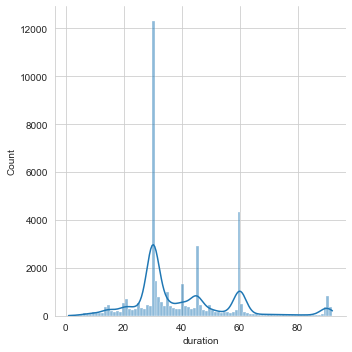

In [27]:
sns.displot(df['duration'], kde = True)

The shape of the histogram is not specifically defined, but we can note that is trimodal, havind three separated classes or intervals, representing the maximum frequency of the distribution.

### b. Boxplot

Boxplot is another way to visualize data and have an idea about it's distribution. 

<AxesSubplot:xlabel='duration'>

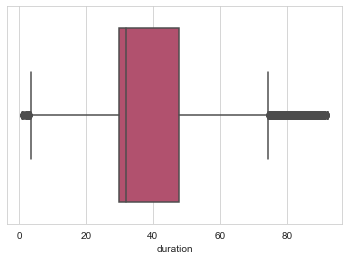

In [28]:
#plt.boxplot(df.duration, meanline = True, vert = False)
sns.boxplot(x=df['duration'], palette='flare')

The above image shows that the median is not centred in the boxplot and is not coincident with the mean, is located near the bottom 25% range. The boxplot is left-skeweed what indicates that the data doesn't follow a normal distribution. Outliers are also easly indentified representing a bigger number on the right side of the boxplot, comparing with the left side. 

# Part 2: Qualitative Analysis

## What's the best length of time to run a campaign?

Text(0.5, 1.0, 'Optimal duration of the project')

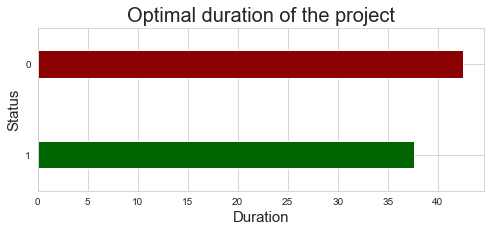

In [29]:
#Define bar plot
colors = ('darkgreen','darkred')
dur = df.groupby('successful')['duration'].mean().sort_values()
dur.plot(kind = 'barh', figsize = (8, 3), color = colors,  zorder=2, width=0.3)

# Set axis label
plt.xlabel('Duration', fontsize = 15)
plt.ylabel('Status', fontsize = 15)
plt.title('Optimal duration of the project', fontsize = 20)


Projects on Kickstarter can last on average from 1 - 50 days. Campaigns with shorter durations show higher success rate.

## What's the ideal pledge goal?

Text(0.5, 1.0, 'Pledge Goal')

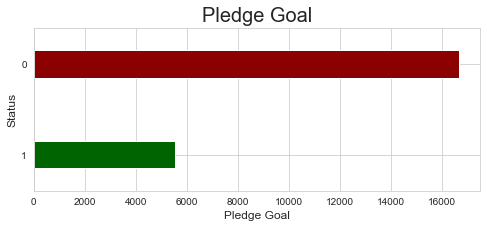

In [30]:
#Define bar plot
colors = ('darkgreen','darkred')
dur = df.groupby('successful')['goal'].mean().sort_values()
dur.plot(kind = 'barh', figsize = (8, 3), color = colors,  zorder=2, width=0.3)

# Set axis label
plt.xlabel('Pledge Goal', fontsize = 12)
plt.ylabel('Status', fontsize = 12)
plt.title('Pledge Goal', fontsize = 20)

In [31]:
#Goal mean of the successful projects
mean_suc = round(df.groupby('successful')['goal'].mean().loc[1],2)
print(f'The ideal pledge goal is $ {mean_suc}')

The ideal pledge goal is $ 5524.55


The graphic shows that the projects with lower pledge have more chances to preform better.
Let's have a look in the relationship between project's goal and actual amount pledge, the graphic below visualizes both the goal and amount pledge for each project and the individual state of the project.

[Text(0.5, 0, 'Amount Pledged in Millions'),
 Text(0, 0.5, 'Goal in Millions'),
 Text(0.5, 1.0, 'Goal vs. Pledged')]

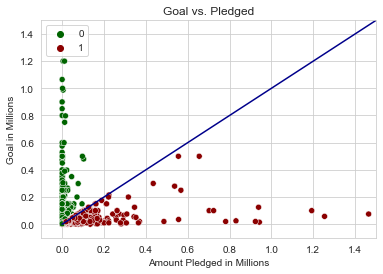

In [32]:
#define colors (darkgreen for successful projects and darkred for failed ones
colors = ('darkgreen','darkred')
#create a plot using seaborn, adjust data to millions
ax = sns.scatterplot(x = df.pledged/1e6, y = df.goal/1e6, hue=df.successful, palette=colors)
#add blue line to better visualize the border between failed and successful projects
sns.lineplot(x=(0,1.5), y=(0,1.5), color='darkblue')
#set the axes from -1 to their maximum (-1 looks better than 0 actually)
ax.set(ylim=(-0.1,1.5), xlim=(-0.1,1.5))
#set labels and title
ax.set(xlabel='Amount Pledged in Millions', ylabel='Goal in Millions', title= 'Goal vs. Pledged')

The graph suggests that unsuccessful projects usually fail without getting close to their goal, meaning that they “do not move horizontally towards the blue line but stay at x~0”. This leads to the conclusion that Kickstarter is an “all or nothing” platform, what we can confirm on the platform website. If you don’t make it, you probably didn’t even come close. On the other hand, many successful projects exceed their stated goal by far and pledge a multiple of their initial goal.

## What type of projects would be most successful at getting funded?

In [33]:
# Print categories
df['category'].unique().tolist()

['Film & Video',
 'Games',
 'Fashion',
 'Music',
 'Art',
 'Dance',
 'Publishing',
 'Theater',
 'Comics',
 'Technology',
 'Design',
 'Photography',
 'Food',
 'Film &amp; Video']

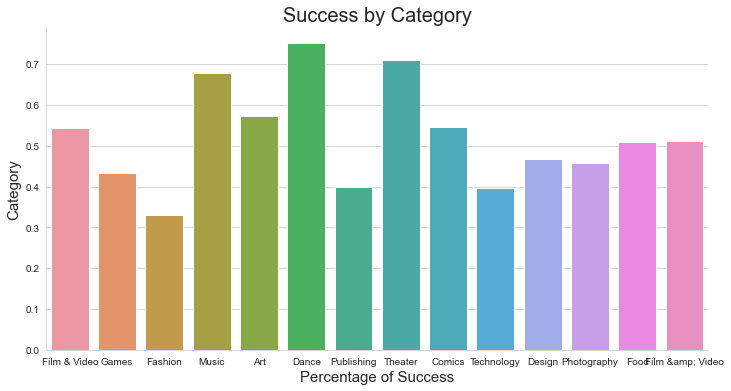

In [34]:
# Plot showing the percentage of Success
sns.catplot(y='successful', x= 'category', data=df, kind='bar', ci = None, aspect = 2)
plt.xlabel('Percentage of Success', fontsize = 15)
plt.ylabel('Category', fontsize = 15)
plt.title('Success by Category', fontsize = 20)
plt.show()

The category with more success is Dance.

## Is there any ideal month/day/time to launch a campaign?

In [35]:
# Create 'funded_month' column based on datetime conversion from 'funded_date' column
df['funded_month'] = df['funded_date'].apply(lambda x: dt.datetime.strptime(x, '%a, %d %b %Y %X -%f').strftime('%B'))
# Create 'funded_weekday' column based on datetime conversion from 'funded_date' column
df['funded_weekday'] = df['funded_date'].apply(lambda x: dt.datetime.strptime(x, '%a, %d %b %Y %X -%f').strftime('%a'))
# Create 'funded_hour column based on datetime conversion from 'funded_date' column
df['funded_hour'] = df['funded_date'].apply(lambda x: dt.datetime.strptime(x, '%a, %d %b %Y %H:%M:%S -%f').strftime('%H'))

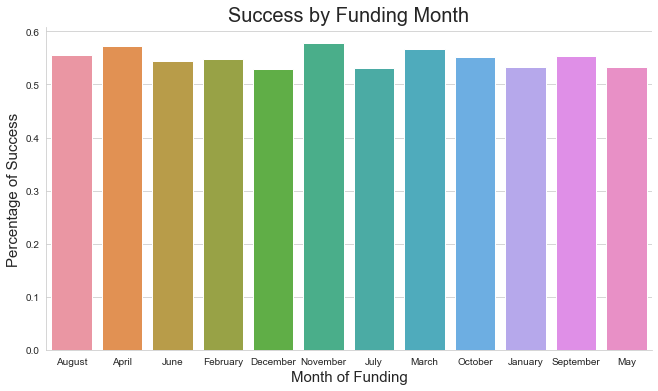

In [36]:
# Plot showing rates of success by Month
sns.catplot(y='successful', x='funded_month', data = df, kind='bar', ci = None, aspect = 1.8)
plt.xlabel('Month of Funding', fontsize = 15)
plt.ylabel('Percentage of Success', fontsize = 15)
plt.title('Success by Funding Month', fontsize = 20)
plt.show()

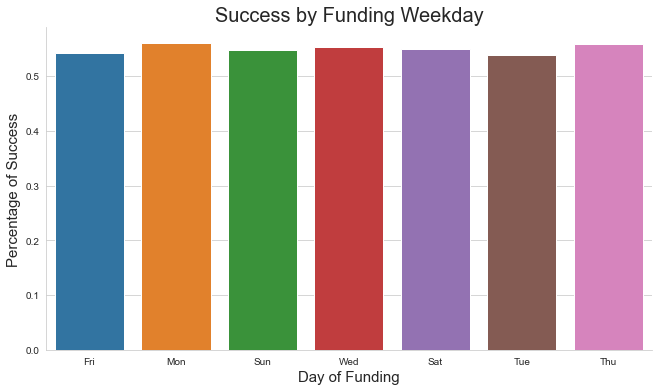

In [37]:
# Plot showing rates of success by Weekday
sns.catplot(y='successful', x='funded_weekday', data = df, kind='bar', ci = None, aspect = 1.8)
plt.xlabel('Day of Funding', fontsize = 15)
plt.ylabel('Percentage of Success', fontsize = 15)
plt.title('Success by Funding Weekday', fontsize = 20)
plt.show()

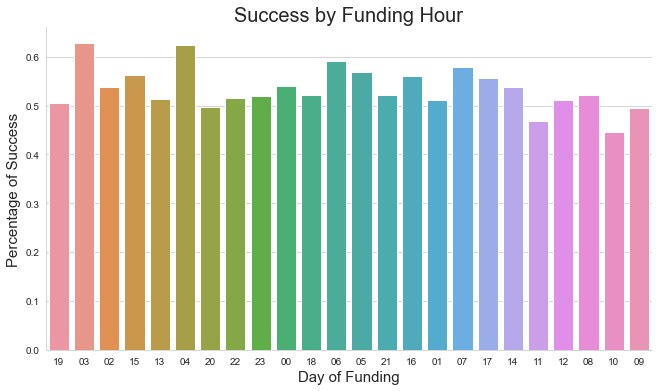

In [38]:
# Plot showing rates of success by Hour
sns.catplot(y='successful', x='funded_hour', data = df, kind='bar', ci = None, aspect = 1.8)
plt.xlabel('Hour of Funding', fontsize = 15)
plt.ylabel('Percentage of Success', fontsize = 15)
plt.title('Success by Funding Hour', fontsize = 20)
plt.show()

In [39]:
# Create 'funded_month' column based on datetime conversion from 'funded_date' column
df['funded_year'] = df['funded_date'].apply(lambda x: dt.datetime.strptime(x, '%a, %d %b %Y %X -%f').strftime('%Y'))

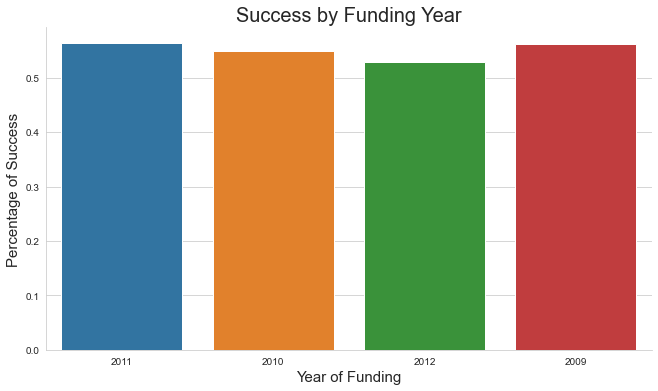

In [40]:
# Plot showing rates of success by Year
sns.catplot(y='successful', x='funded_year', data = df, kind='bar', ci = None, aspect = 1.8)
plt.xlabel('Year of Funding', fontsize = 15)
plt.ylabel('Percentage of Success', fontsize = 15)
plt.title('Success by Funding Year', fontsize = 20)
plt.show()